<a href="https://colab.research.google.com/github/MSebastian2021/Artificial_Neural_Networks_Tests/blob/main/ANN_Exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is a prediction whether a customer will exit the bank or not
**Exited** is the label column

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN_test_data/Churn_Modelling.csv')
#Kaggle database (source: https://colab.research.google.com/drive/#create=1&folderId=0ADeqHwPhnbKbUk9PVA)
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

display the number of rows:

In [ ]:
dataset.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
#create a variable to hold dataset columns from 3 to 13
x = dataset.iloc[:, 3: 13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
#store the labels to array variable, y
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0])

# Encode text values using ordinal encoding (column 1: Geography, and column 2: Coding)
First method: **Ordinal encoding** is used when the order of the values is important

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
x_ord_1 = dataset.iloc[:, 3: 13].values

labelencoder_x = LabelEncoder() #instantiate an object of the class LabelEncoder
x_ord_1[:, 1] = labelencoder_x.fit_transform(x_ord_1[:, 1]) #ordinal encoding for col 1
x_ord_1[:, 2] = labelencoder_x.fit_transform(x_ord_1[:, 2]) #ordinal encoding for col 2

x_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

ORDINAL ENCODING - 2nd way (Bug - sets all values to 0)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:

x_ord_2 = dataset.iloc[:, 3: 13].values

ordinal_encoder_1 = OrdinalEncoder() #instantiate an object of the class LabelEncoder
x_ord_2[:, 1] = ordinal_encoder_1.fit_transform([x_ord_2[:, 1]])
x_ord_2[:, 2] = ordinal_encoder_1.fit_transform([x_ord_2[:, 2]]) #ordinal encoding for col 1

x_ord_2

array([[619, 0.0, 0.0, ..., 1, 1, 101348.88],
       [608, 0.0, 0.0, ..., 0, 1, 112542.58],
       [502, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0.0, ..., 0, 1, 42085.58],
       [772, 0.0, 0.0, ..., 1, 0, 92888.52],
       [792, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

# One Hot Encoding Method

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np



In [ ]:
# use the ordinally-converted data
x  = x_ord_1

# encoder is the column transformer
# the column numbers to be tranformed here is [1] but can be [1, 1, 3]
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], 
                       remainder='passthrough') # leave the rest of the column untouched

x = np.array(ct.fit_transform(x), dtype = np.int)
df = pd.DataFrame(x)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101348
1,0,0,1,608,0,41,1,83807,1,0,1,112542
2,1,0,0,502,0,42,8,159660,3,1,0,113931
3,1,0,0,699,0,39,1,0,2,0,0,93826
4,0,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270
9996,1,0,0,516,1,35,10,57369,1,1,1,101699
9997,1,0,0,709,0,36,7,0,1,0,1,42085
9998,0,1,0,772,1,42,3,75075,2,1,0,92888


Here, we remove the first column to avoid the dumm data trap
Dummy data trap: a scenario where in dependent variables are highly correlated ( one variable predicts the value of the others)
In one hot enoding, one dummy variable can be predicted through dummy variables, causing redundancy

Using all dummy variables in One hot encoding cause dummy trap in regression models


In [ ]:
x=x[:, 1:]
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101348
1,0,1,608,0,41,1,83807,1,0,1,112542
2,0,0,502,0,42,8,159660,3,1,0,113931
3,0,0,699,0,39,1,0,2,0,0,93826
4,0,1,850,0,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,771,1,39,5,0,2,1,0,96270
9996,0,0,516,1,35,10,57369,1,1,1,101699
9997,0,0,709,0,36,7,0,1,0,1,42085
9998,1,0,772,1,42,3,75075,2,1,0,92888


One Hot Encoding - 2nd way

In [ ]:
x_df = dataset.iloc[:, 3: 13]
#drops the first column (France, because we do not want correlated data, 
#and we can conclude from the values of Spain and Germany the value of FRance)
#axis=1 means to concatenate along the columns (put one col beside the other)
x_df = pd.concat([x_df, pd.get_dummies(x_df['Geography'], prefix='country', drop_first=True)], axis=1)

#get rid fo the original geography column
x_df.drop(['Geography'], axis=1, inplace=True)
x_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0


Split the data into training and test set (20% for the test set)

In [ ]:
from sklearn.model_selection import train_test_split

#we use the random_state to make sure the splitting contains 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Standardize the data (xstandardised = (x - x_mean)/std_dev

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
#we use the scale set from the training set to transform the test set
x_test = sc.transform(x_test)

df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.714901,-0.572731,-0.230820,0.915091,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402
1,-0.583124,-0.572731,-0.251509,-1.092788,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493
2,1.714901,-0.572731,-0.396330,-1.092788,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793
3,1.714901,-0.572731,-0.044622,-1.092788,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941
4,-0.583124,1.746019,0.658795,0.915091,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.714901,-0.572731,-0.303231,0.915091,0.774987,0.684415,0.495441,-0.911510,0.643760,0.977259,-0.579177
7996,1.714901,-0.572731,0.348464,-1.092788,2.303420,-0.701742,0.076671,-0.911510,0.643760,-1.023271,-0.529777
7997,-0.583124,-0.572731,0.224332,-1.092788,0.583933,1.377494,-1.225991,-0.911510,0.643760,0.977259,-0.140972
7998,-0.583124,-0.572731,0.131233,-1.092788,0.010771,1.030954,-1.225991,0.802257,0.643760,0.977259,0.017805


# Building the Model, using 2 dense layers

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

#add first layer and first hidden layer, units = number of nodes / neurons
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

#add second hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [ ]:
#add the output layer (sigmoid for binary, softmax for multiclass)
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
#compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
#training
#no of steps has to do with the batch size (number of data points/batch size, 8000/10=800)
#batch size should not be more than 32
history = model.fit(x_train, y_train, batch_size=10, epochs = 200, verbose=2)

Epoch 1/200
800/800 - 2s - loss: 0.4885 - accuracy: 0.7965 - 2s/epoch - 3ms/step
Epoch 2/200
800/800 - 1s - loss: 0.4314 - accuracy: 0.7972 - 1s/epoch - 2ms/step
Epoch 3/200
800/800 - 1s - loss: 0.4269 - accuracy: 0.7972 - 1s/epoch - 2ms/step
Epoch 4/200
800/800 - 1s - loss: 0.4226 - accuracy: 0.8037 - 892ms/epoch - 1ms/step
Epoch 5/200
800/800 - 1s - loss: 0.4187 - accuracy: 0.8230 - 896ms/epoch - 1ms/step
Epoch 6/200
800/800 - 1s - loss: 0.4160 - accuracy: 0.8278 - 894ms/epoch - 1ms/step
Epoch 7/200
800/800 - 1s - loss: 0.4142 - accuracy: 0.8295 - 894ms/epoch - 1ms/step
Epoch 8/200
800/800 - 1s - loss: 0.4129 - accuracy: 0.8325 - 896ms/epoch - 1ms/step
Epoch 9/200
800/800 - 1s - loss: 0.4119 - accuracy: 0.8330 - 906ms/epoch - 1ms/step
Epoch 10/200
800/800 - 1s - loss: 0.4108 - accuracy: 0.8331 - 881ms/epoch - 1ms/step
Epoch 11/200
800/800 - 1s - loss: 0.4100 - accuracy: 0.8340 - 901ms/epoch - 1ms/step
Epoch 12/200
800/800 - 1s - loss: 0.4090 - accuracy: 0.8340 - 898ms/epoch - 1ms/ste

In [ ]:
#Evaluation - loss will be higher, accuracy will be lower
loss, accuracy = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8335


In [ ]:
#Evaluation
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Prediction

In [ ]:
#Predict using the info of a new customer

new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.transform(new_customer)
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction > 0.5)

new_prediction

array([[False]])

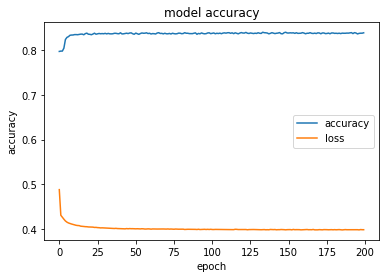

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])

plt.show()

In [ ]:
#An alternative to using train_test_split() is to specify a validation_split percentage
#This is done when fitting the model, for example:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

history = model.fit(x, y, verbose = 1, validation_split=0.2, epochs = 100, batch_size=10)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3962 - accuracy: 0.8385 - val_loss: 0.4071 - val_accuracy: 0.8350
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8378 - val_loss: 0.4067 - val_accuracy: 0.8330
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3962 - accuracy: 0.8372 - val_loss: 0.4079 - val_accuracy: 0.8310
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8386 - val_loss: 0.4066 - val_accuracy: 0.8315
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3957 - accuracy: 0.8378 - val_loss: 0.4075 - val_accuracy: 0.8325
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3959 - accuracy: 0.8360 - val_loss: 0.4069 - val_accuracy: 0.8320
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3955 - accuracy: 0.8369 - val_loss: 0.4069 - val_accuracy: 0.8315

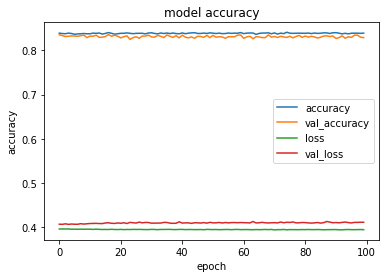

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])

plt.show()

# Save the model in H5 format

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/ANN_test_data/churn_model.h5')

In [ ]:
#to load the model again:
my_trained_model = keras.model.load('/content/drive/MyDrive/Colab Notebooks/ANN_test_data/churn_model.h5')